In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Initializing the neurons.
### In this model, we have only one hidden layer.

In [28]:
def initialise(in_neuron,hidden_neuron,out_neuron):
  w1 = np.random.rand(hidden_neuron,in_neuron)
  #In this case, the value of the weight 1 is between the quantity of the input neuron and the hidden neuron

  w2 = np.random.rand(out_neuron,hidden_neuron)
  #The value of the weight 2 is between the quantity of the hidden neuron and the output neuron 

  b1 = np.zeros((hidden_neuron,1))
  #The value of the bias 1 is the quantity of the hidden neuron

  b2 = np.zeros((out_neuron,1))
  #The value of the bias 2 is the quantity of the output neuron
  
  return w1,w2,b1,b2

# Definition of Functions

### Activation function and Output function and their derivatives.

In [50]:
def ReLU(z):
  return np.tanh(z)
#The ReLU function is a function that returns the value of the input if it is greater than 0, otherwise it returns 0
#This function is used to activate the neurons in the hidden layer

def Linear(z):
  return z
#The Linear function is a function that returns the value of the input
#This function is used to activate the neurons in the output layer

def LinearPrimer(z):
  return 1
#The LinearPrimer function is a function that returns 1
#This function is the derivative of the Linear function
#This function is used to activate the neurons in the output layer

def ReLUPrimer(z):
  a = 1 - np.tanh(z)**2
  return a
#The ReLUPrimer function is a function that returns True if the value of the input is greater than 0, otherwise it returns False
#This function is the derivative of the ReLU function
#This function is used to activate the neurons in the hidden layer


# Forward Propagation

In [51]:
def forwardprop(a0,w1,b1,w2,b2):

  z1 = np.dot(w1,a0) + b1

  #Z = (Weight x Input + Bias)
  #In this case, the value of the Z1 is the value of the weight 1 multiplied by the value of the input plus the value of the bias 1
  
  a1 = ReLU(z1)
  #Actiavion function of the hidden layer
  #In this case, the value of the A1 is the value of the ReLU function of the value of the Z1

  z2 = np.dot(w2,a1) + b2
  #Z = (Weight x Input + Bias)
  #In this case, the value of the Z2 is the value of the weight 2 multiplied by the value of the A1 plus the value of the bias 2

  a2 = Linear(z2)
  #Actiavion function of the output layer
  #In this case, the value of the A2 is the value of the Linear function of the value of the Z2
  
  return z1,a1,z2,a2


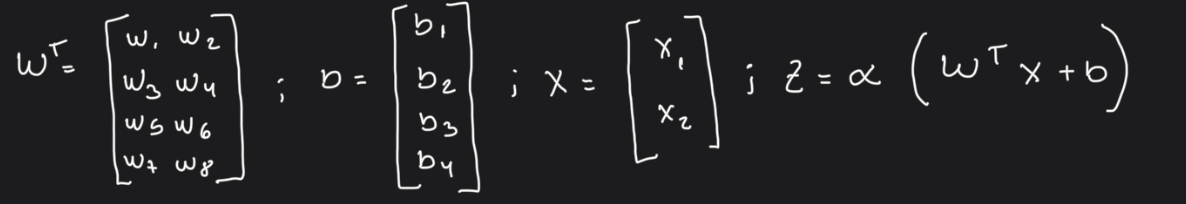

# Back Propagation

### Part 1 - Update Weights and Bias.

In [52]:
#The learning rate determines how much the weights and bias are adjusted during each optimization step. 
# It controls the size of the updates when searching for the optimal values.

#For example, if the current value is 1 and the learning rate is 0.01, the next value could be 1.01 or 0.99, depending on the gradient’s direction.

#If the learning rate is too high, the model may overshoot the optimal value, never converging properly. 
# On the other hand, if it is too low, the model might take too long to converge or even get stuck in a suboptimal point.

#This function is used to update the weights and bias in the neural network based on the computed gradient and learning rate.

def UpdateWeightsAndBias(w1,b1,w2,b2,dw1,db1,dw2,db2,learning_rate):
  w1 = w1 - learning_rate*dw1

  b1 = b1 - learning_rate*db1

  w2 = w2 - learning_rate*dw2

  b2 = b2 - learning_rate*db2
  
  return w1,b1,w2,b2


### Part 2 - Calculate the Gradient.

In [53]:
def ComputeGradient(y, a0, a1, a2, z1, z2, w2):
  # With backpropagation, we can calculate the gradient of the weights and bias in a neural network.
  # The gradient is the derivative of the loss function with respect to the weights and bias,
  # indicating the direction and magnitude of the adjustments needed to minimize the model's error.
  # To compute this gradient, we use the chain rule, which allows us to differentiate composite functions.
  # Since a neural network's output results from multiple nested functions, the chain rule helps break down
  # the derivative of the loss function in terms of the previous layers.
  # This process is essential for efficiently updating the weights and bias, enabling the model to learn
  # and improve its performance over multiple training iterations.


  # De2 = y - a2 (Error of the output layer)

  # a2 = activation of the output layer * z2

  # If we do the partial derivative of the error with respect to the activation of the output layer, we get:

  de2 = (a2 - y) * LinearPrimer(z2)

  db2 = de2
  dw2 = np.dot(de2, a1.T)
  da2 = np.dot(w2.T, de2)
  de1 = da2 * ReLUPrimer(z1)
  db1 = de1
  dw1 = np.dot(de1, a0.T)

  return dw1, db1, dw2, db2


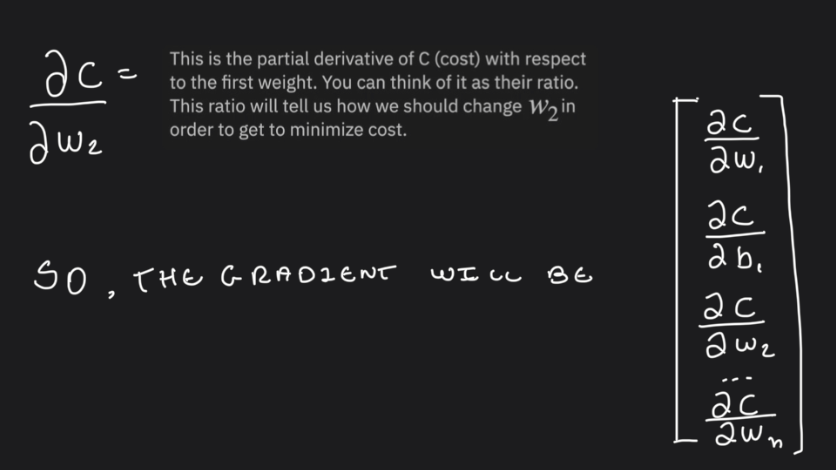
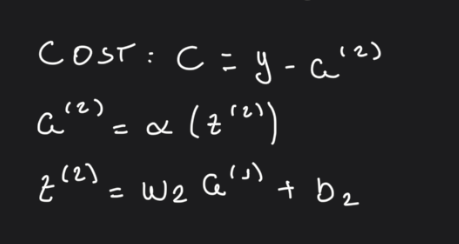

# Creating the dataset

In [69]:
# The dataset is a 1000x2 matrix, where each row represents a data point with two features.
# The values are randomly generated between -1 and 1.
# The goal is to create a dataset for training a neural network, where:
# - The input is 'x_input'.
# - The output ('x_ground') is obtained by multiplying 'x_input' by a rotation matrix.

x_input = np.random.uniform(-1, 1, (1000, 2))
rm = [[-1, 0],  
      [0, 1]]  # Rotation matrix

x_ground = np.dot(rm, x_input.T).T  # Applying the transformation

# Plot the data

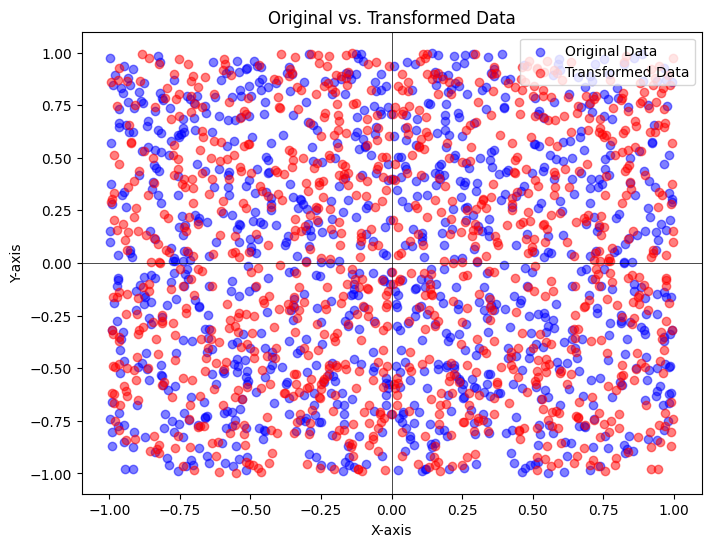

In [70]:
# As we can see, the data is mirrored along the x-axis.
plt.figure(figsize=(8, 6))
plt.scatter(x_input[:, 0], x_input[:, 1], color='blue', alpha=0.5, label='Original Data')
plt.scatter(x_ground[:, 0], x_ground[:, 1], color='red', alpha=0.5, label='Transformed Data')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Original vs. Transformed Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


# Training

In [71]:
epoch=100
#The epoch is the number of times the model will iterate over the entire dataset during the training process.
#Each epoch consists of a forward pass, where the input data is fed through the network to compute the output,
#and a backward pass, where the model adjusts the weights and bias based on the computed gradient.
#The goal is to minimize the error between the predicted output and the ground truth labels.

learning_rate = 0.1
#The learning rate determines how much the weights and bias are adjusted during each optimization step.
#It controls the size of the updates when searching for the optimal values.
#For example, if the current value is 1 and the learning rate is 0.01, the next value could be 1.01 or 0.99, depending on the gradient’s direction.
#If the learning rate is too high, the model may overshoot the optimal value, never converging properly.
#On the other hand, if it is too low, the model might take too long to converge or even get stuck in a suboptimal point.


w1, w2, b1, b2 = initialise(2,10,2)
#In this case, we are initializing the weights and bias of the neural network, we have 2 input neurons, 10 hidden neurons, and 2 output neurons.
#2 output neurons because we have 2 features in the dataset, x and y.
#I put 10 because I want it, but you can put any number you want.

for i in range(epoch):
  cost=0
  for j in range(1000):
    #The 1000 is the number of data points in the dataset.
    #In this case, we are iterating over each data point in the dataset to train the model.

    a0=x_input[j,:].T.reshape(2,1)

    y=x_ground[j,:].T.reshape(2,1)

    z1,a1,z2,a2 = forwardprop(a0,w1,b1,w2,b2)

    dw1,db1,dw2,db2 = ComputeGradient(y,a0,a1,a2,z1,z2,w2)

    w1,b1,w2,b2 = UpdateWeightsAndBias(w1,b1,w2,b2,dw1,db1,dw2,db2,learning_rate)

    cost=cost+np.sum((a2-y)**2)*.5
    # In this case, we are using the Mean Squared Error (MSE) as the loss function to measure the model's performance.

# This is our Neural Network.
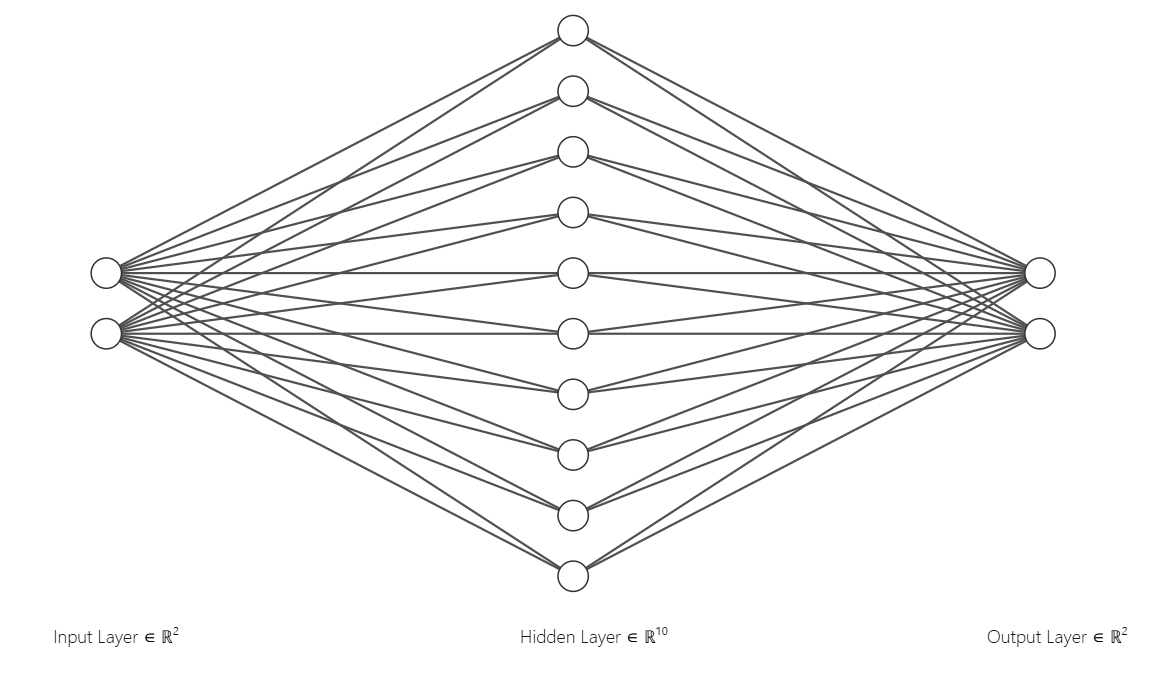

# Creating a dataset to test.

In [105]:
a, b, c, d, e = 2, -5, 3, 0.5, -1.2

test_x = np.arange(0, 1, 0.01)

test_y = (a * test_x**4 + b * test_x**3 + c * test_x**2 + d * test_x + e) + np.sin(3 * test_x) * np.exp(-test_x) + np.log(test_x + 1)

test = np.column_stack([test_x, test_y])

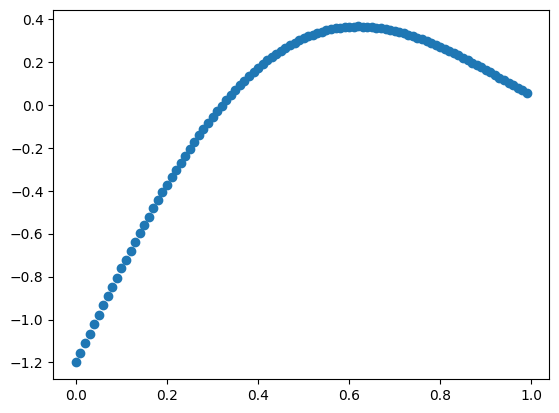

In [106]:
plt.scatter(test_x,test_y)
plt.show()

# Runing the model.

In [107]:
n=test.shape[0]
o_x=[]
o_y=[]
for i in range(n):
  a0=test[i,:].T.reshape(2,1)
  z1,a1,z2,a2 = forwardprop(a0,w1,b1,w2,b2)
  o_x.append(a2[0,0])
  o_y.append(a2[1,0])

# Result

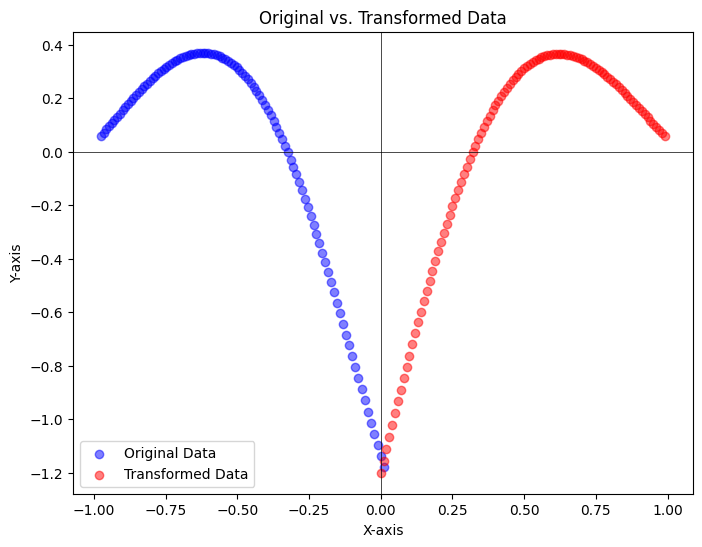

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(o_x, o_y, color='blue', alpha=0.5, label='Original Data')
plt.scatter(test[:,0], test[:, 1], color='red', alpha=0.5, label='Transformed Data')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Original vs. Transformed Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()
